<a href="https://colab.research.google.com/github/KeyMoney22/Flu-Shot-Learning/blob/main/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing relevant Libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting our drive

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

In [62]:
#Importing our data
df_train_features = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_features.csv')
df_train_labels = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_labels.csv')


In [63]:
# Displaying the snapshot of out train_labels dataframe
df_train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [64]:
# Displaying summary info of our train_labels dataframe
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [65]:
df_train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [66]:
# Combining the labels and features data frames into one data frame df_train

df_train = pd.merge(df_train_features, df_train_labels, on='respondent_id')
df_train.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## **Data Cleaning**

In [68]:
# Create a copy of the dataframe to avoid modifying the original
df_train_copy = df_train.copy()

<Figure size 800x600 with 0 Axes>

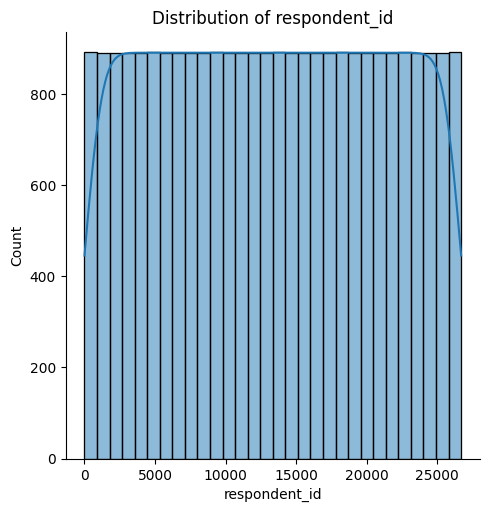

<Figure size 800x600 with 0 Axes>

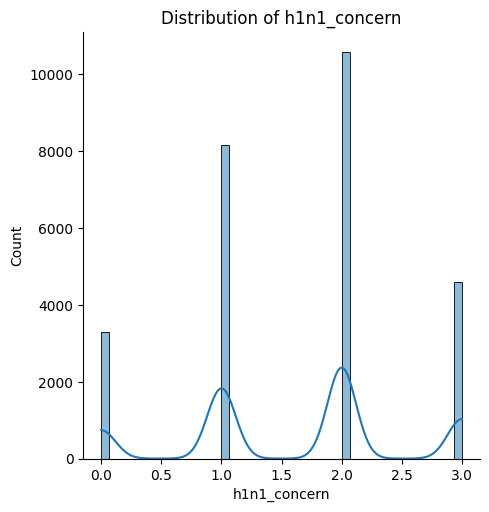

<Figure size 800x600 with 0 Axes>

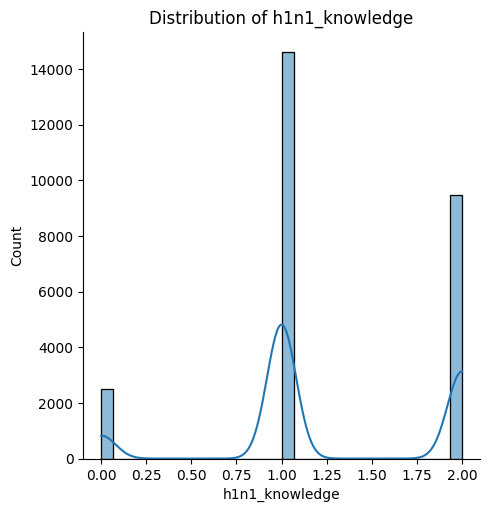

<Figure size 800x600 with 0 Axes>

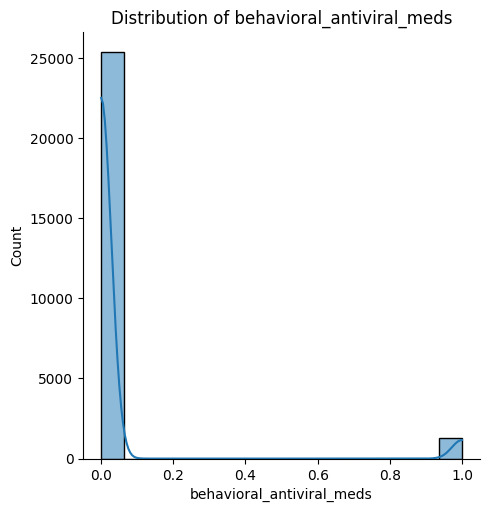

<Figure size 800x600 with 0 Axes>

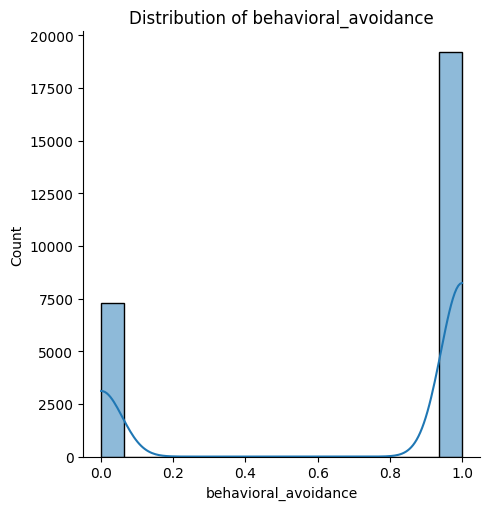

<Figure size 800x600 with 0 Axes>

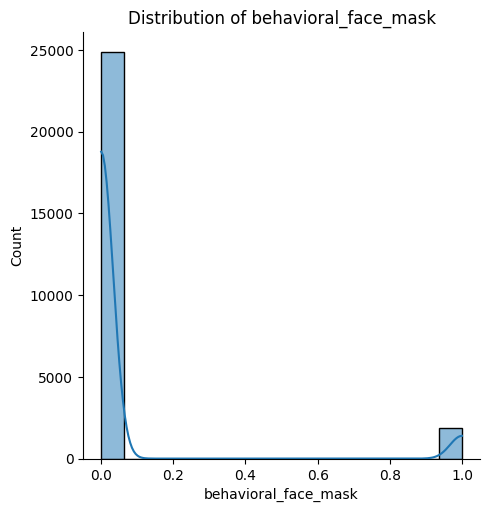

<Figure size 800x600 with 0 Axes>

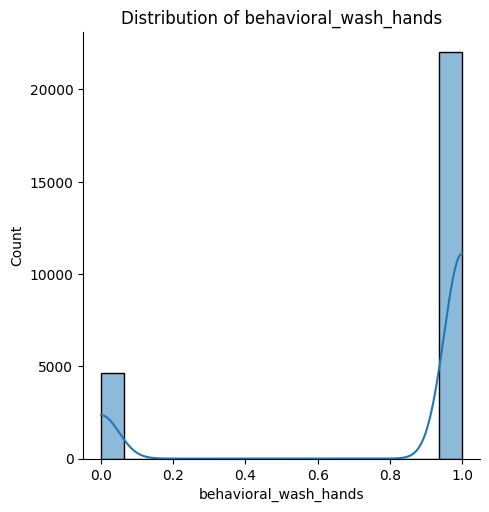

<Figure size 800x600 with 0 Axes>

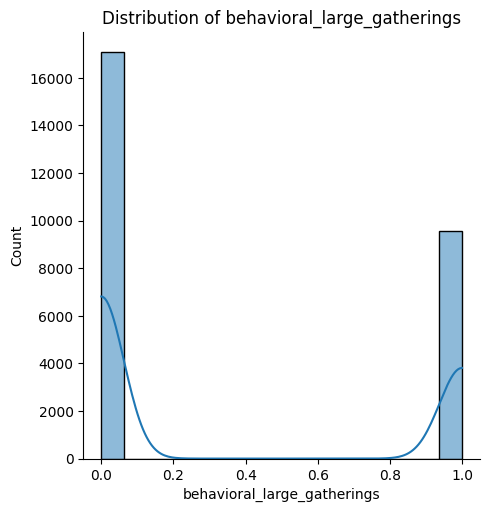

<Figure size 800x600 with 0 Axes>

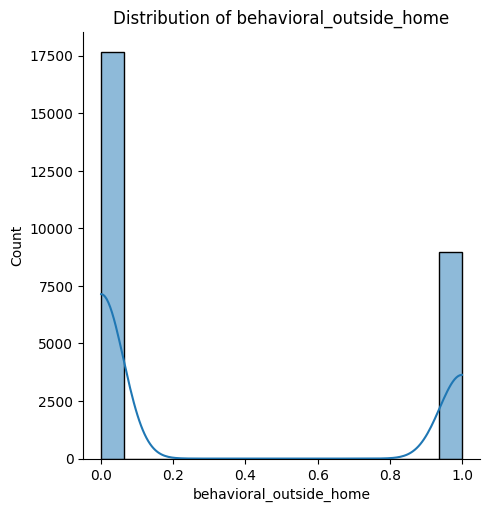

<Figure size 800x600 with 0 Axes>

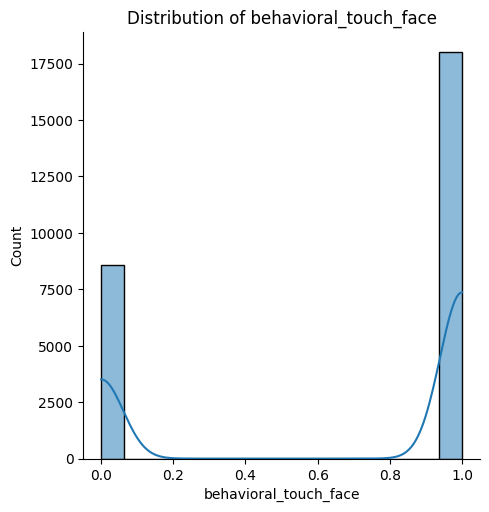

<Figure size 800x600 with 0 Axes>

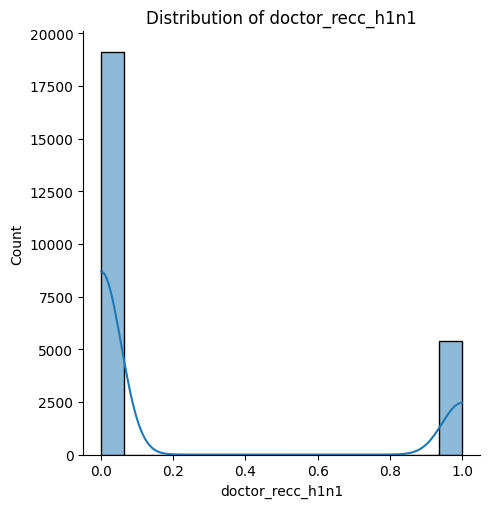

<Figure size 800x600 with 0 Axes>

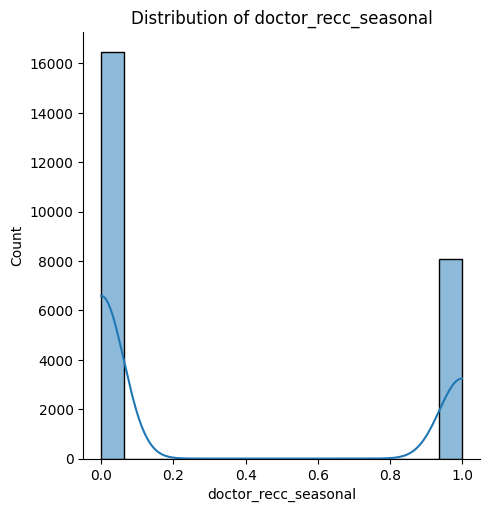

<Figure size 800x600 with 0 Axes>

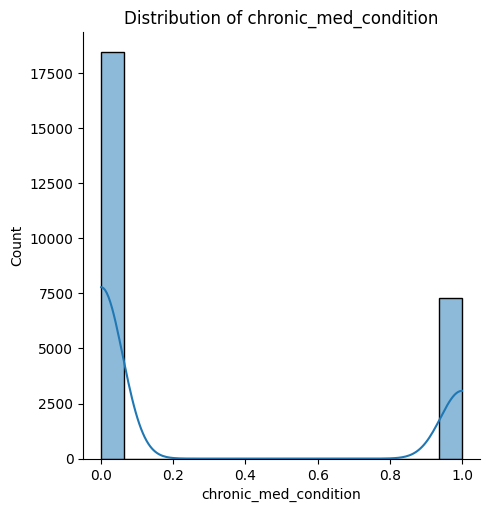

<Figure size 800x600 with 0 Axes>

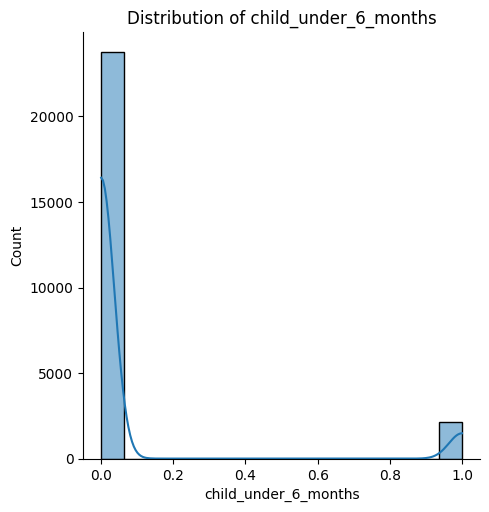

<Figure size 800x600 with 0 Axes>

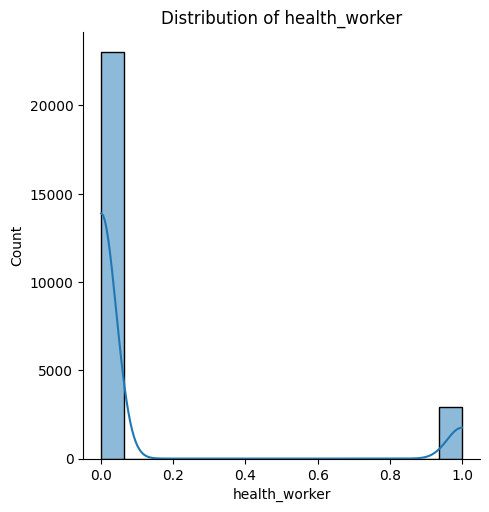

<Figure size 800x600 with 0 Axes>

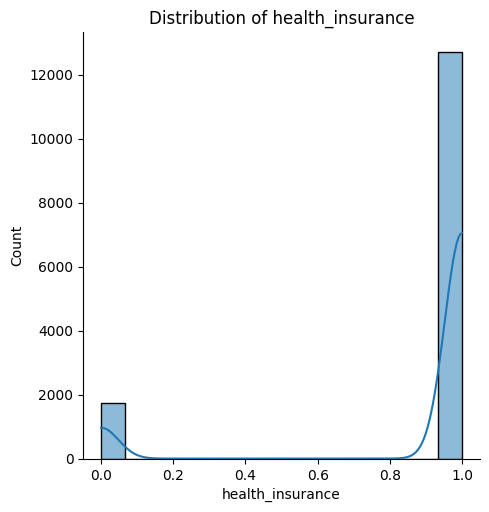

<Figure size 800x600 with 0 Axes>

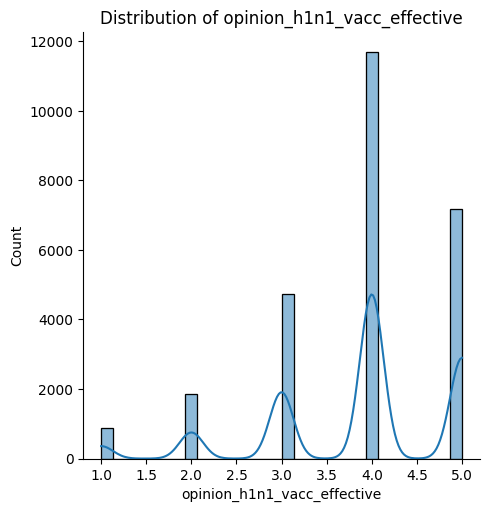

<Figure size 800x600 with 0 Axes>

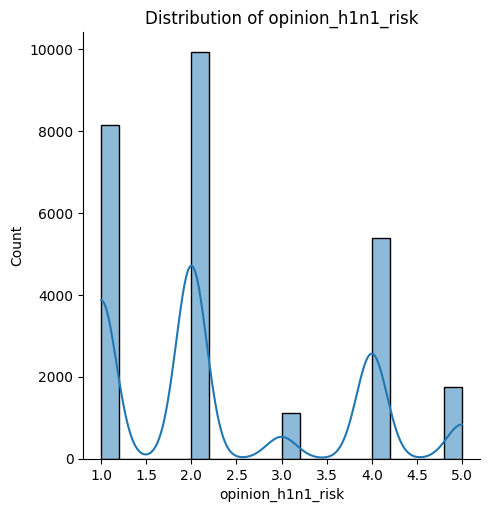

<Figure size 800x600 with 0 Axes>

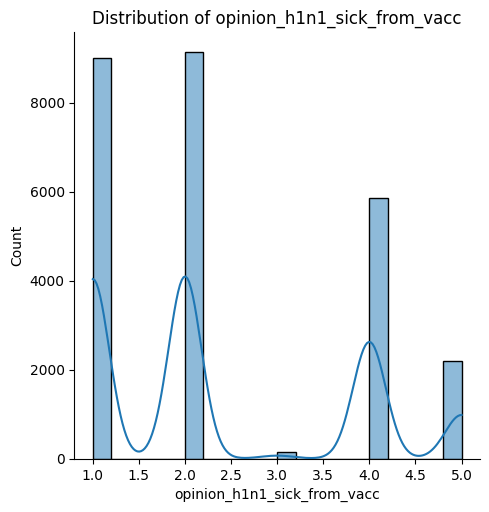

<Figure size 800x600 with 0 Axes>

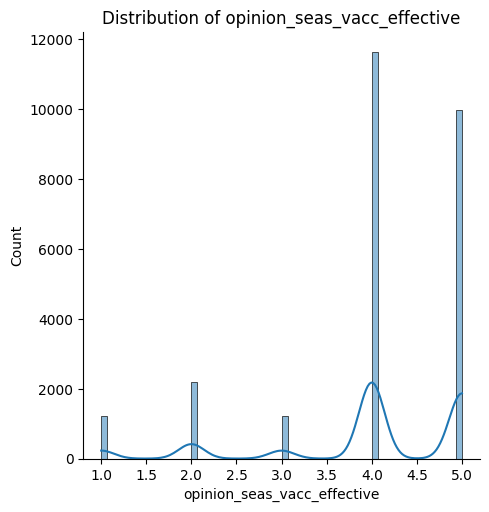

<Figure size 800x600 with 0 Axes>

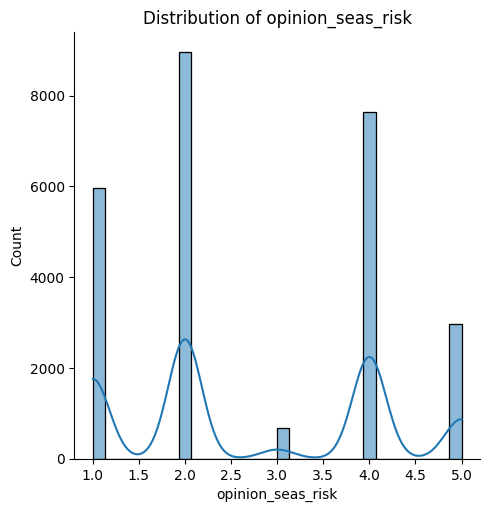

<Figure size 800x600 with 0 Axes>

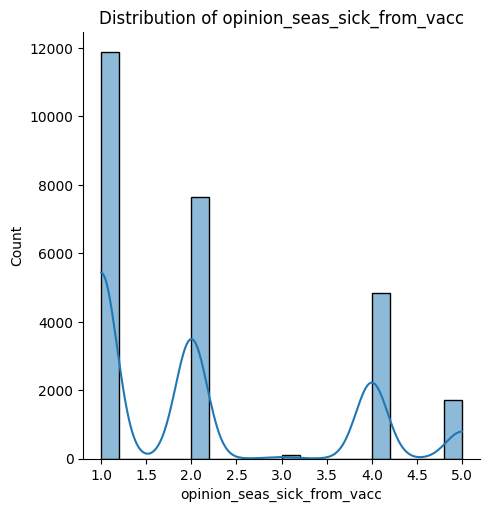

<Figure size 800x600 with 0 Axes>

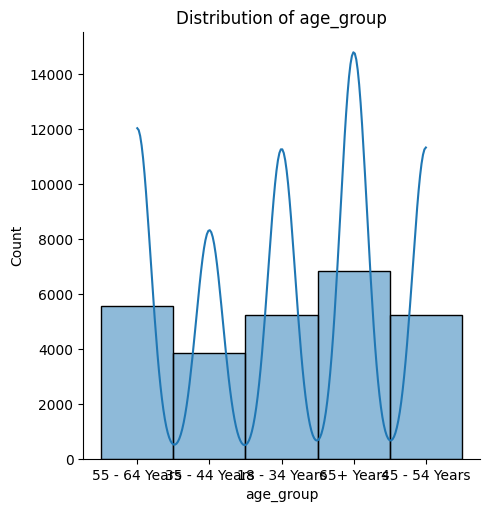

<Figure size 800x600 with 0 Axes>

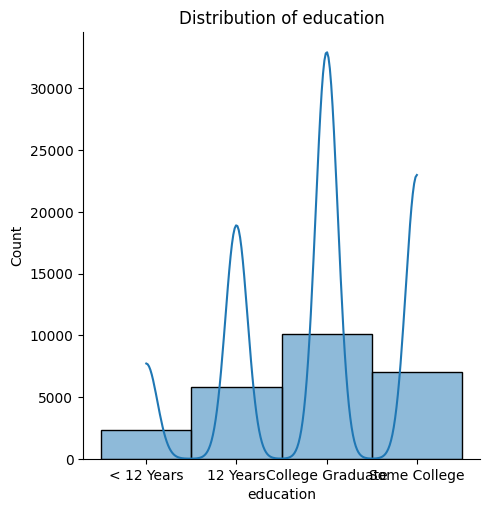

<Figure size 800x600 with 0 Axes>

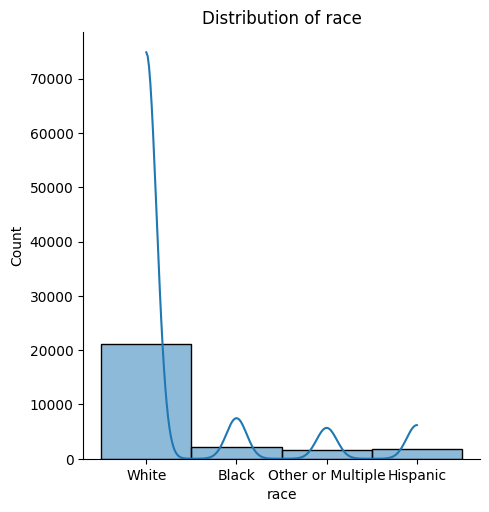

<Figure size 800x600 with 0 Axes>

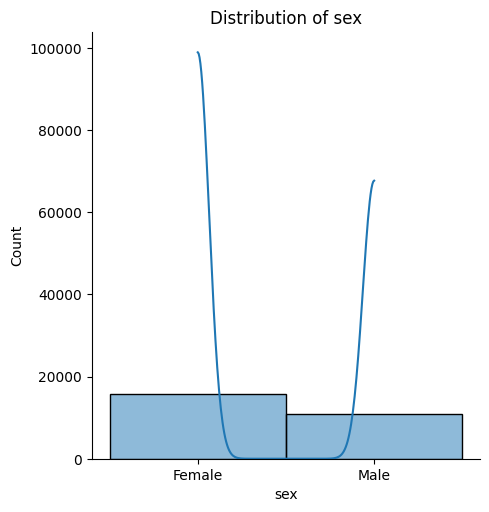

<Figure size 800x600 with 0 Axes>

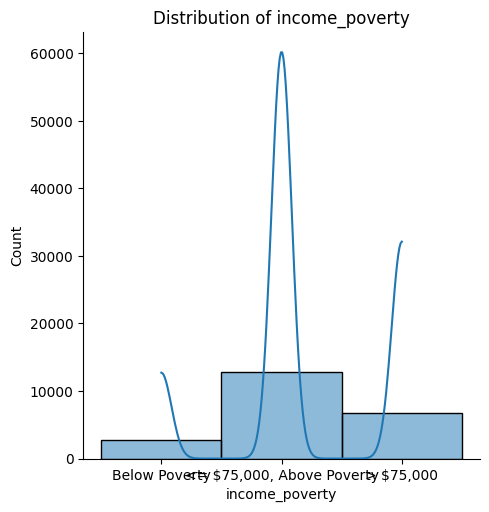

<Figure size 800x600 with 0 Axes>

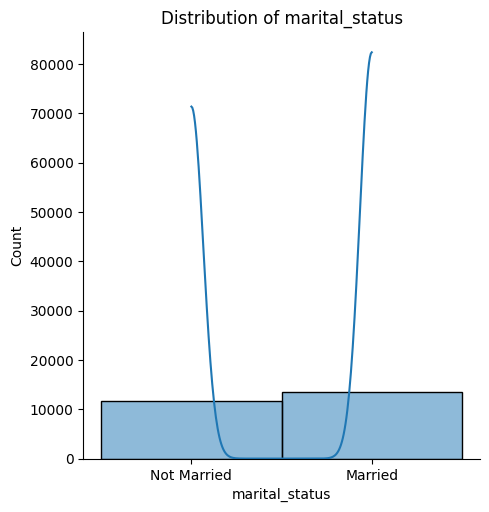

<Figure size 800x600 with 0 Axes>

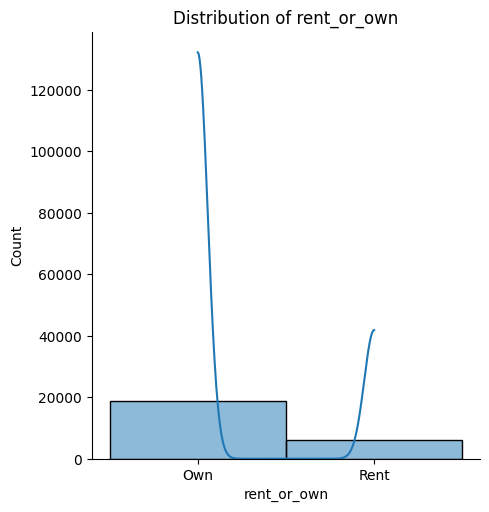

<Figure size 800x600 with 0 Axes>

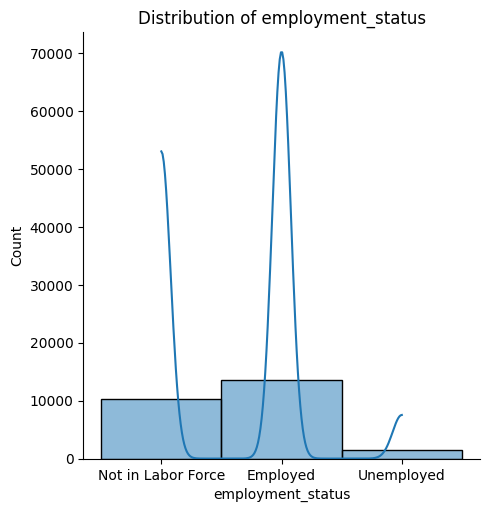

<Figure size 800x600 with 0 Axes>

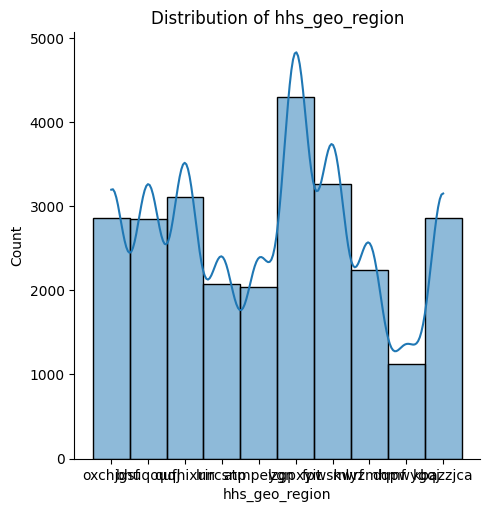

<Figure size 800x600 with 0 Axes>

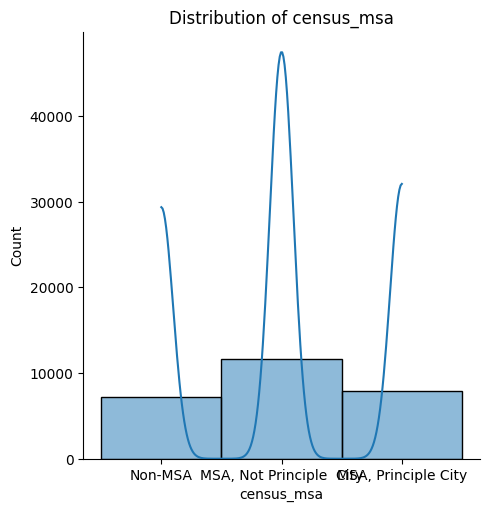

<Figure size 800x600 with 0 Axes>

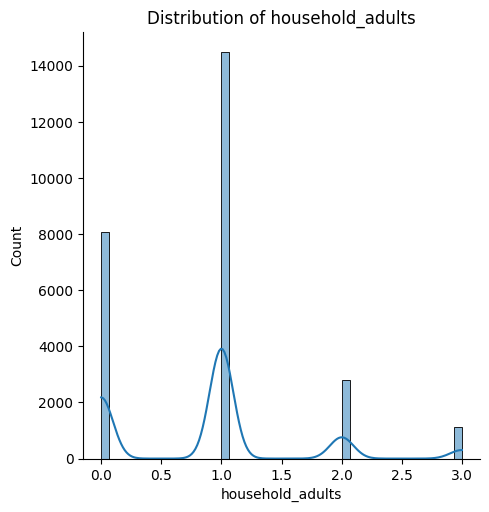

<Figure size 800x600 with 0 Axes>

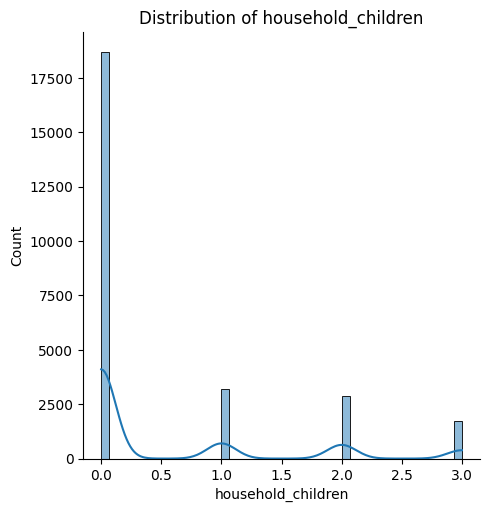

<Figure size 800x600 with 0 Axes>

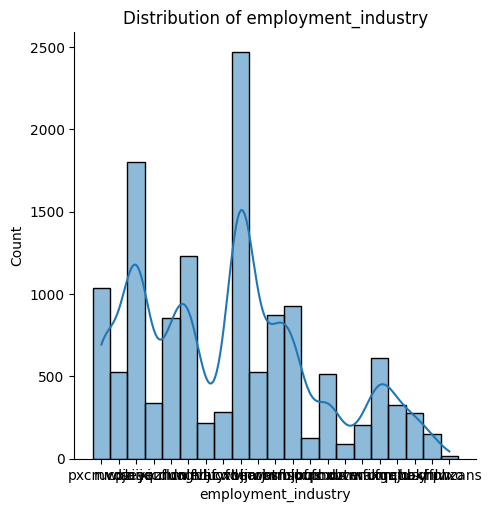

<Figure size 800x600 with 0 Axes>

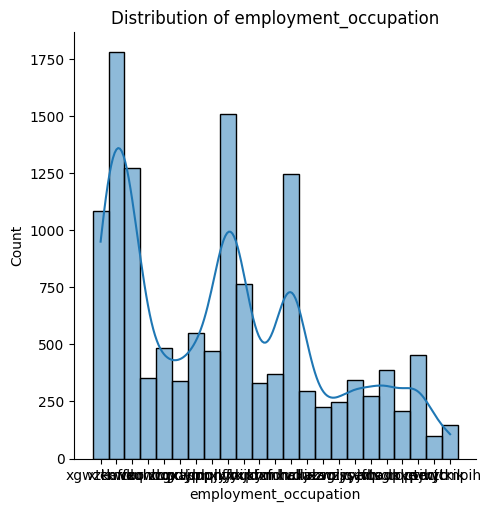

<Figure size 800x600 with 0 Axes>

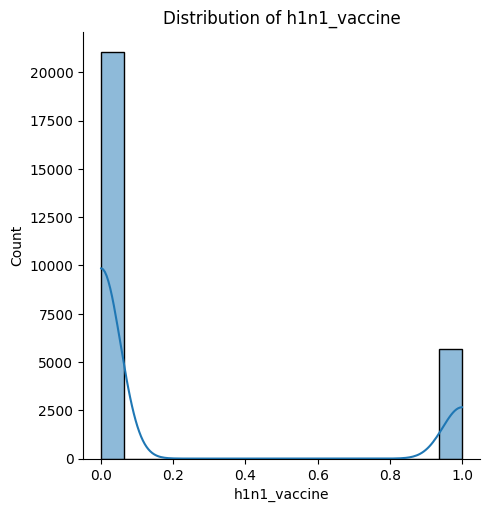

<Figure size 800x600 with 0 Axes>

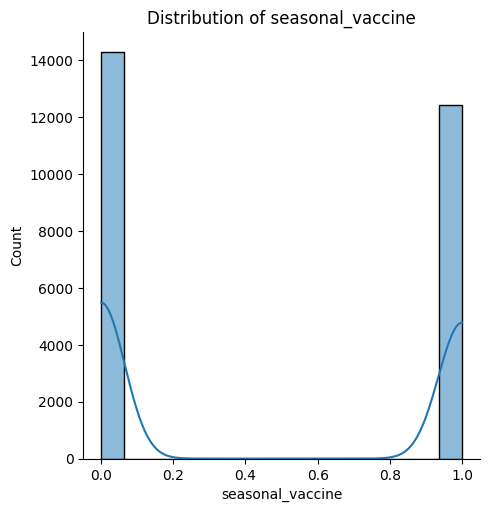

In [69]:
# Loop through each column in df_train
for column in df_train.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()


In [70]:
df_train_copy.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [71]:
df_train_copy.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [72]:
# Checking for Missing values/Entries
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [73]:
binary_cols = ['behavioral_antiviral_meds',
'behavioral_avoidance',
'behavioral_face_mask',
'behavioral_wash_hands',
'behavioral_large_gatherings',
'behavioral_outside_home',
'behavioral_touch_face',
'doctor_recc_h1n1',
'doctor_recc_seasonal',
'child_under_6_months',
'health_worker',
'health_insurance',
'income_poverty',
'rent_or_own',
'chronic_med_condition']

Since the columns assigned to binary_cols are binary features, we can replace missing values with the most frequent value (mode).
This preserves the distribution of the data while handling missing entries.
We are assuming that the majority of individuals would record either 1 or 0/ yes or no

<Figure size 800x600 with 0 Axes>

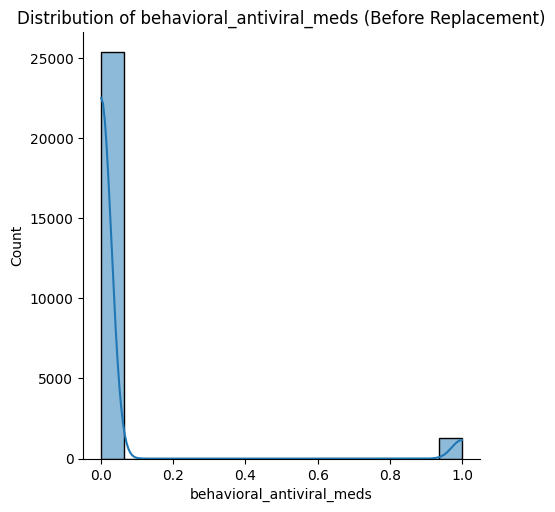

<Figure size 800x600 with 0 Axes>

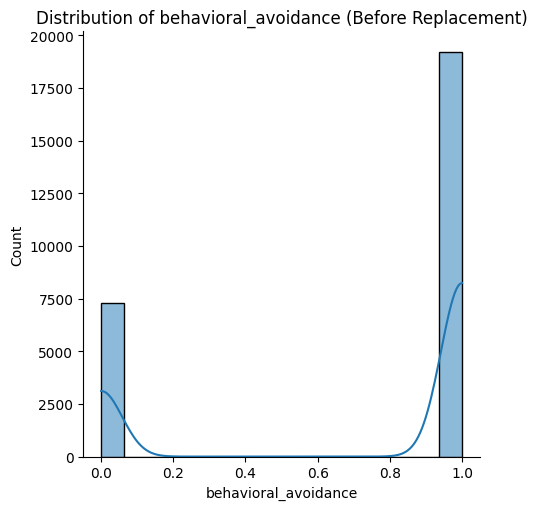

<Figure size 800x600 with 0 Axes>

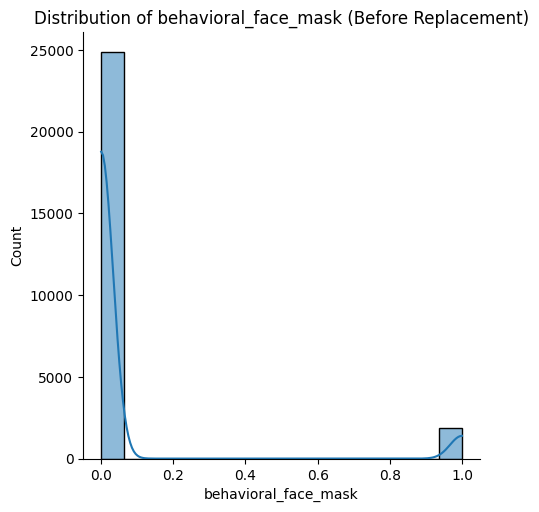

<Figure size 800x600 with 0 Axes>

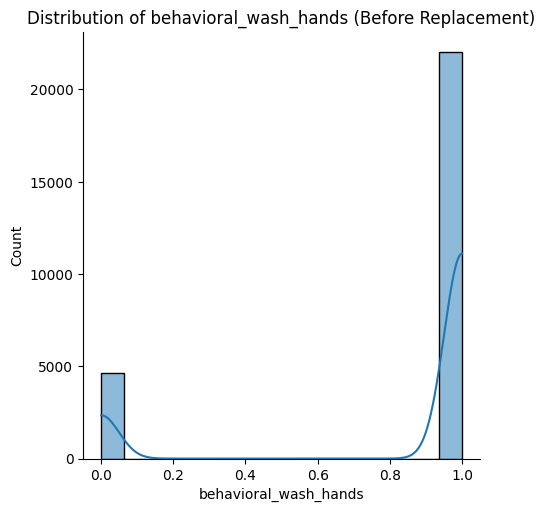

<Figure size 800x600 with 0 Axes>

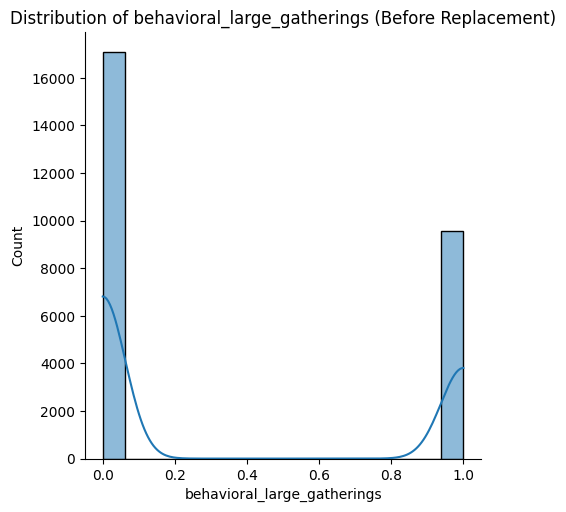

<Figure size 800x600 with 0 Axes>

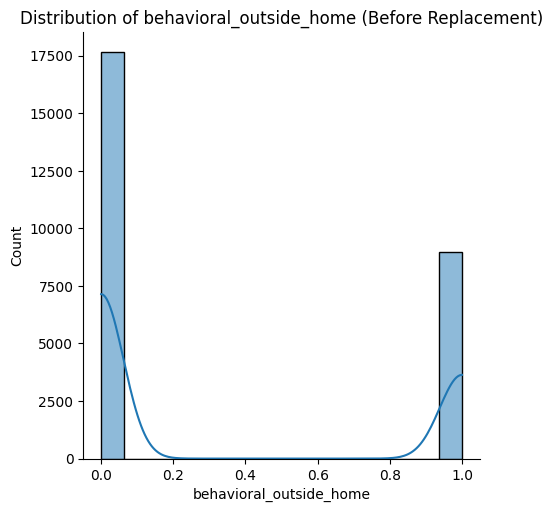

<Figure size 800x600 with 0 Axes>

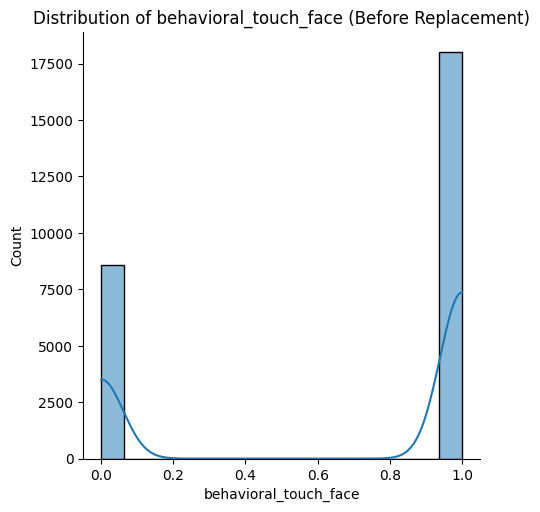

<Figure size 800x600 with 0 Axes>

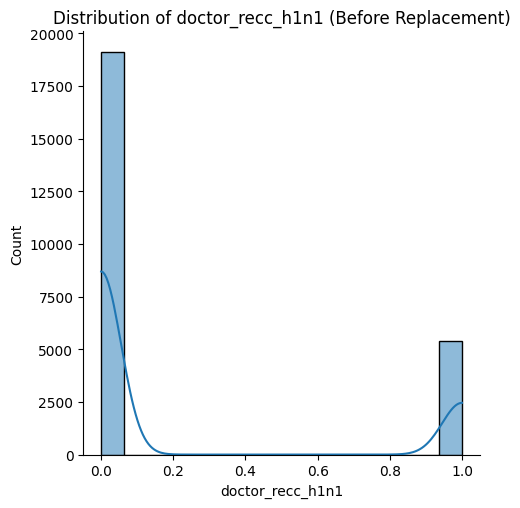

<Figure size 800x600 with 0 Axes>

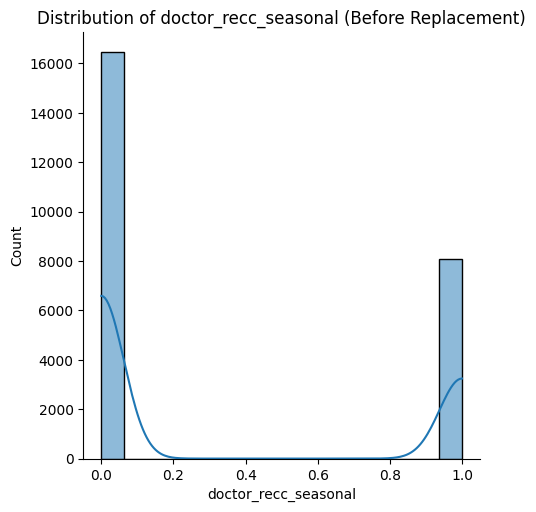

<Figure size 800x600 with 0 Axes>

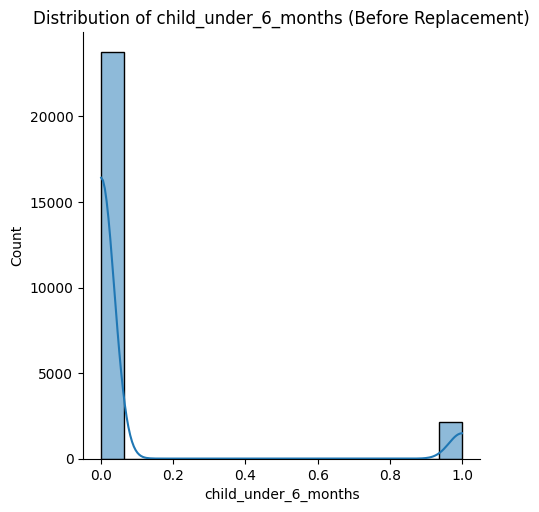

<Figure size 800x600 with 0 Axes>

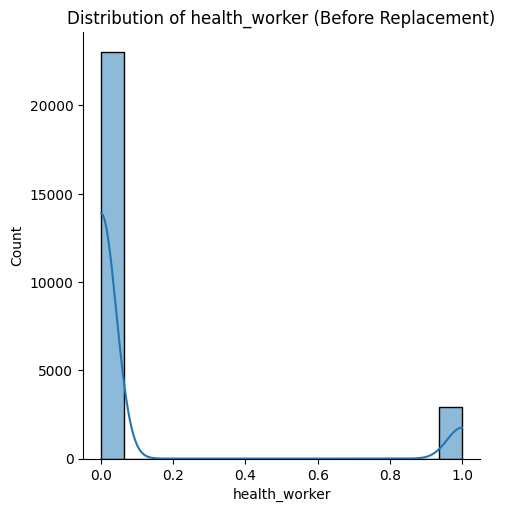

<Figure size 800x600 with 0 Axes>

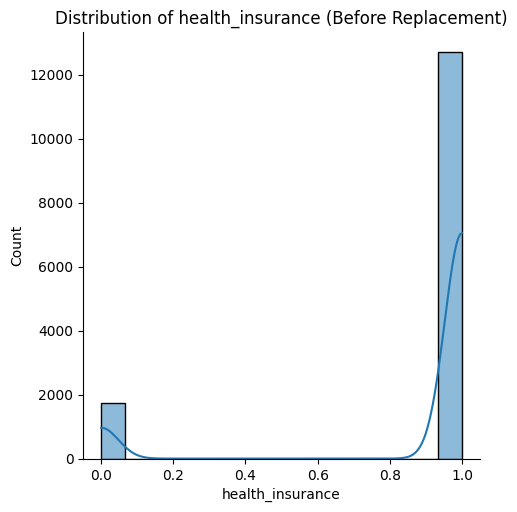

<Figure size 800x600 with 0 Axes>

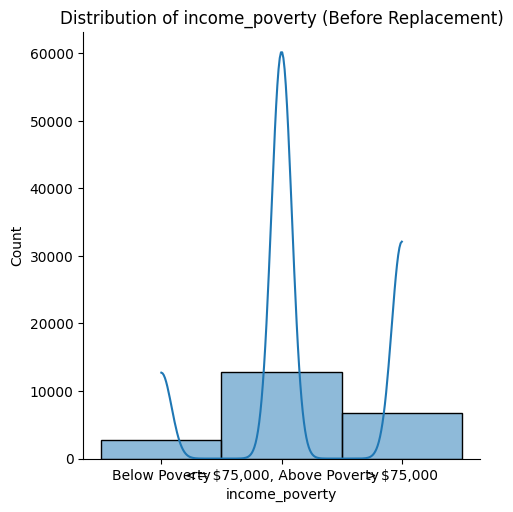

<Figure size 800x600 with 0 Axes>

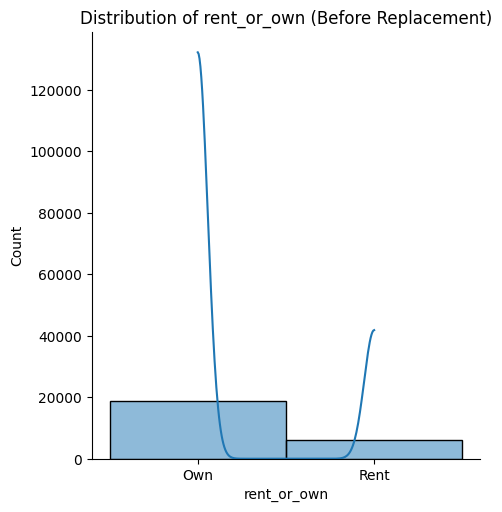

<Figure size 800x600 with 0 Axes>

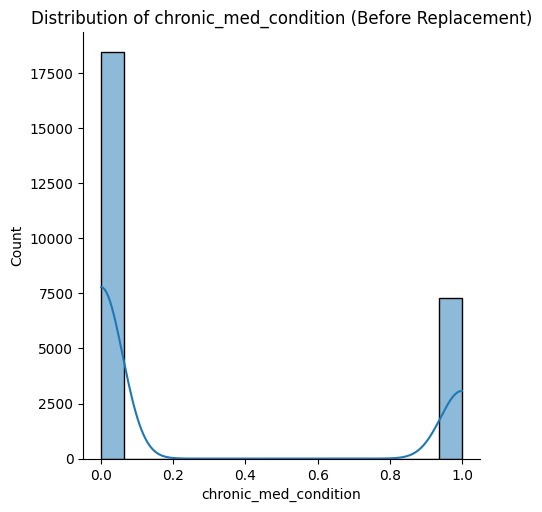

<Figure size 800x600 with 0 Axes>

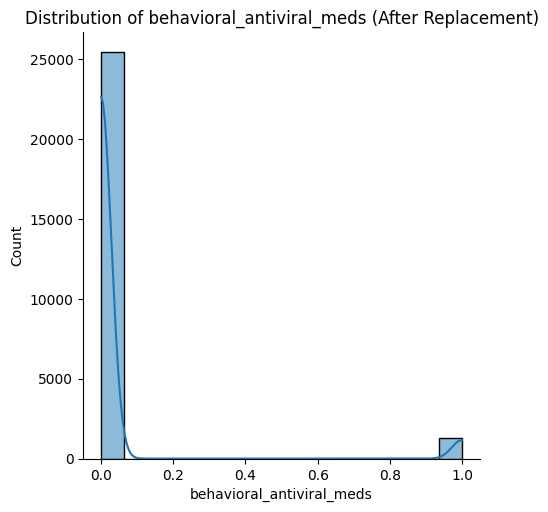

<Figure size 800x600 with 0 Axes>

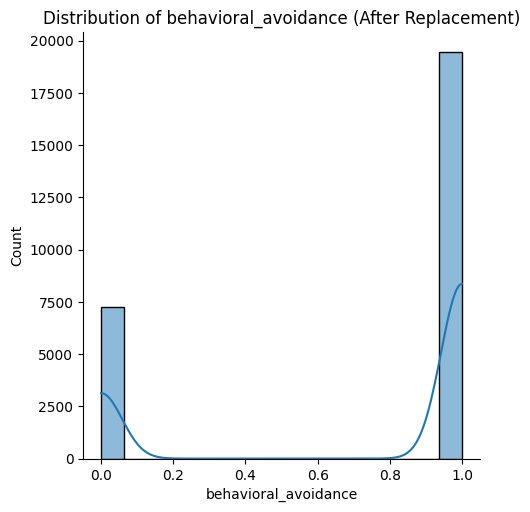

<Figure size 800x600 with 0 Axes>

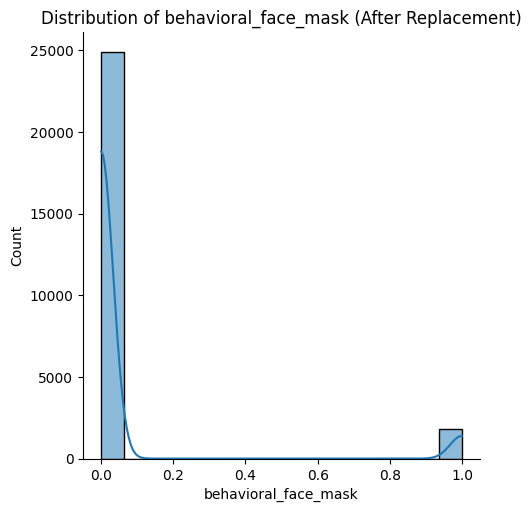

<Figure size 800x600 with 0 Axes>

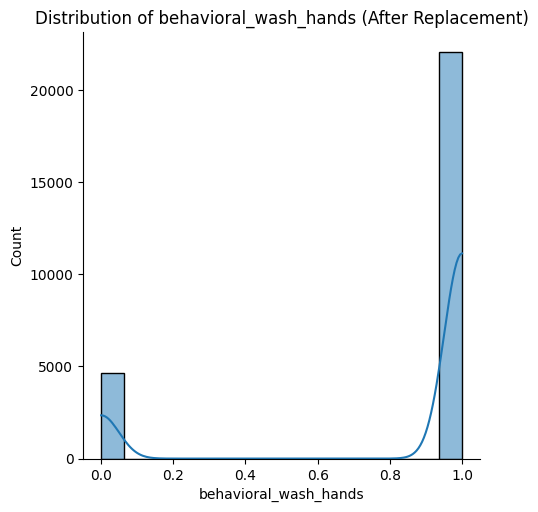

<Figure size 800x600 with 0 Axes>

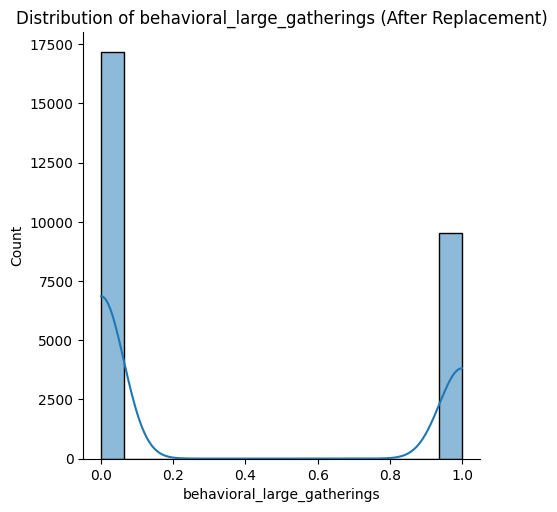

<Figure size 800x600 with 0 Axes>

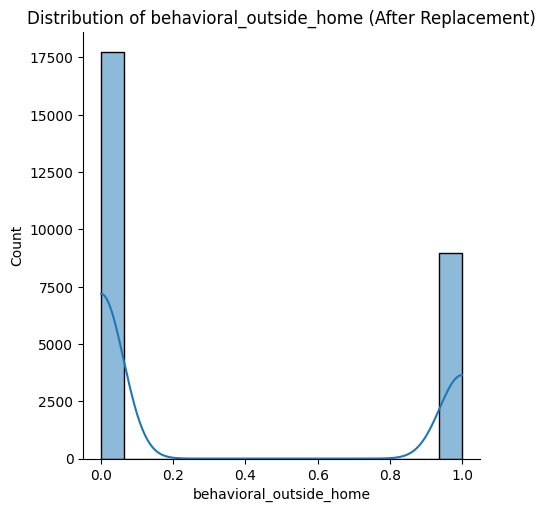

<Figure size 800x600 with 0 Axes>

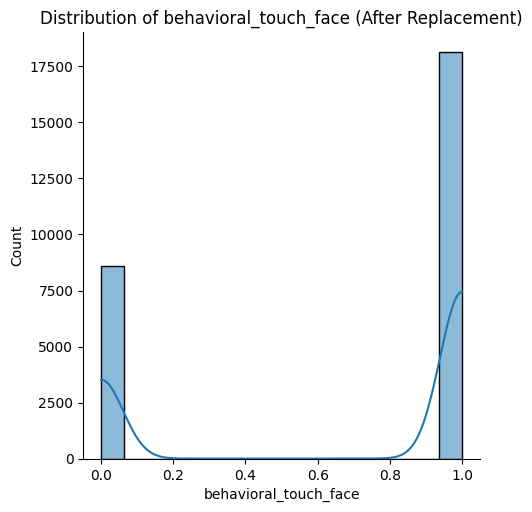

<Figure size 800x600 with 0 Axes>

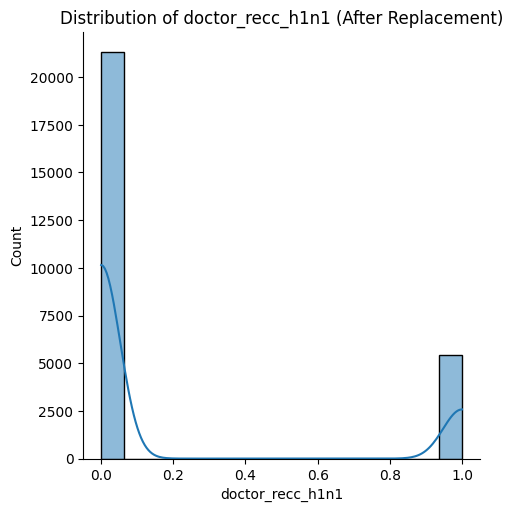

<Figure size 800x600 with 0 Axes>

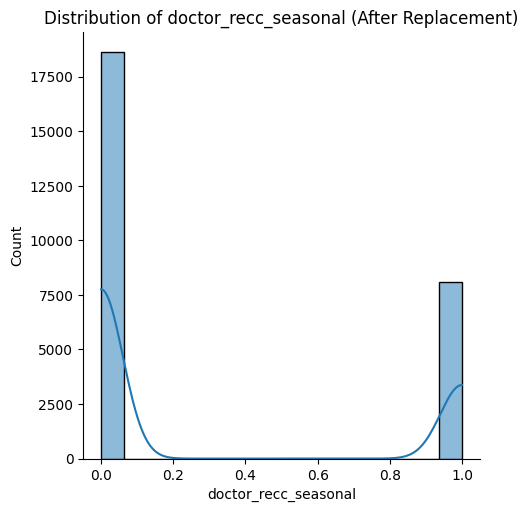

<Figure size 800x600 with 0 Axes>

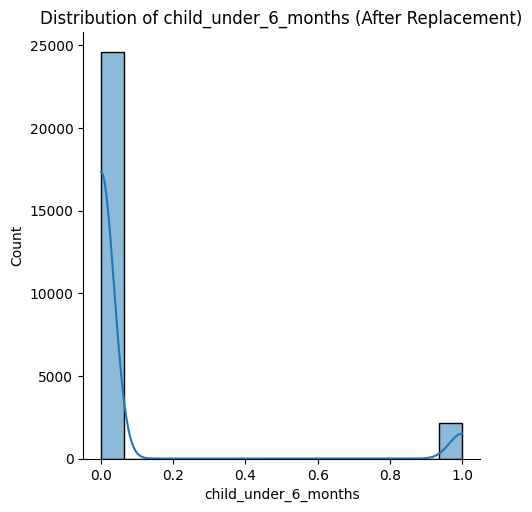

<Figure size 800x600 with 0 Axes>

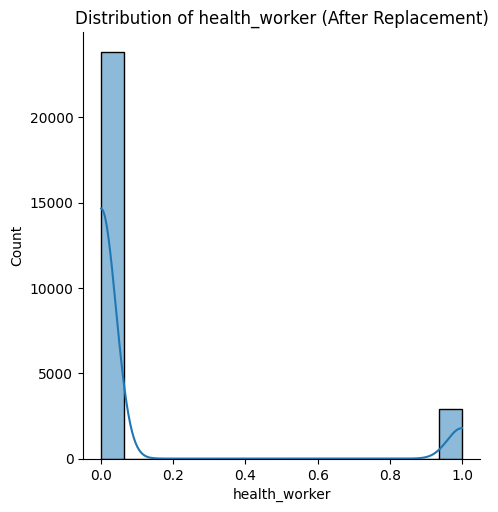

<Figure size 800x600 with 0 Axes>

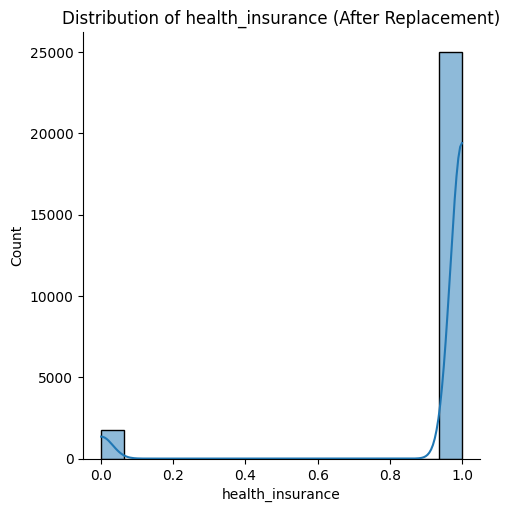

<Figure size 800x600 with 0 Axes>

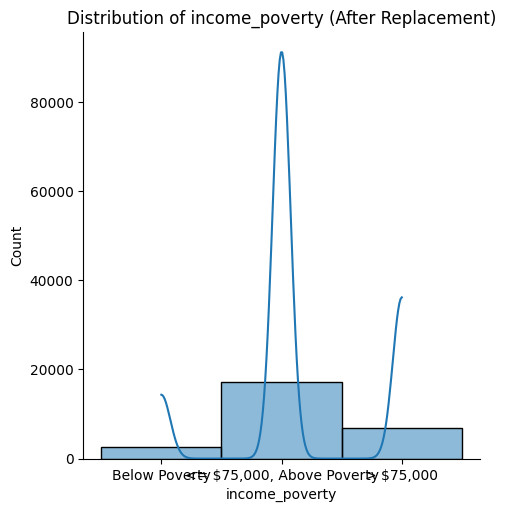

<Figure size 800x600 with 0 Axes>

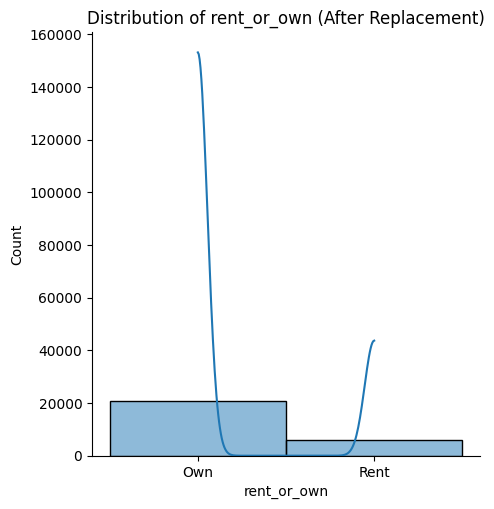

<Figure size 800x600 with 0 Axes>

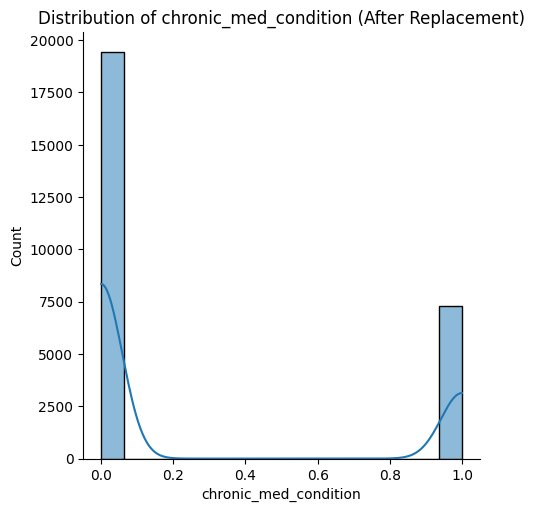

In [74]:
# Before replacement
for column in binary_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column} (Before Replacement)')
  plt.show()


# Replace missing values with the mode for binary columns
for col in binary_cols:
  df_train_copy[col].fillna(df_train_copy[col].mode()[0], inplace=True)


# After replacement
for column in binary_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column} (After Replacement)')
  plt.show()


In [75]:
# Replacing null values in the health_insurance column with 0
# This is assuming all those with a null value have no medical insurance

df_train_copy['health_insurance'].fillna(0, inplace=True)


**employment_industry & employment_occupation Columns**

In [76]:
df_train_copy['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [77]:
df_train_copy['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

Since the employment industry & employment_occupation details are not well recorded we drop the two columns

In [78]:
# Droping the employment industry and employment occupation columns

df_train_copy = df_train_copy.drop(['employment_industry', 'employment_occupation'], axis=1)


In [79]:
# Replacing non values with either 1 or 0 based on the ratio 1301:25335 in the behavioral_antiviral_meds column

# Calculating the ratio of 1s to 0s
# ratio_1 = 7271 / (7271 + 19228)

# # Filling NaN values with either 1 or 0 based on the calculated ratio
# df_train_copy['behavioral_avoidance'] = df_train_copy['behavioral_avoidance'].fillna(np.random.choice([1, 0], p=[ratio_1, 1 - ratio_1]))

**h1n1_concern Column**

In [80]:
df_train_copy['h1n1_concern'].value_counts()

,count
h1n1_concern,
2.0,10575
1.0,8153
3.0,4591
0.0,3296


<Figure size 800x600 with 0 Axes>

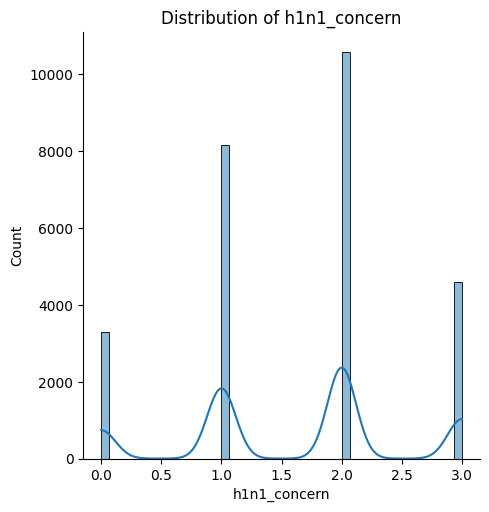

In [81]:
# A dist plot of the h1n1_concern column

plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern')
plt.show()


<Figure size 800x600 with 0 Axes>

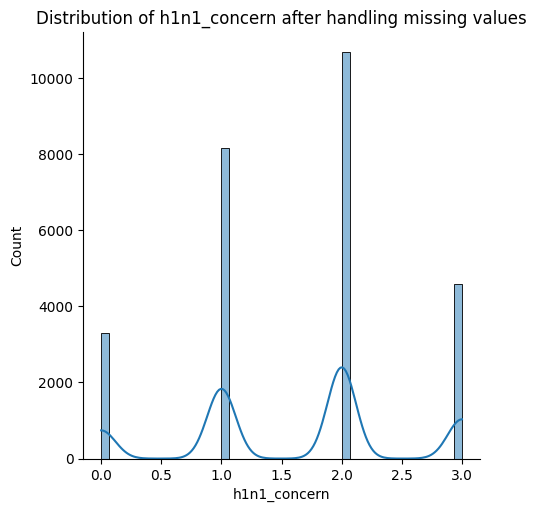

In [82]:
# Since 'h1n1_concern' is an ordinal feature representing the level of concern about H1N1,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['h1n1_concern'].fillna(df_train_copy['h1n1_concern'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern after handling missing values')
plt.show()


**h1n1_knowledge Column**

In [83]:
df_train_copy['h1n1_knowledge'].unique()

array([ 0.,  2.,  1., nan])

In [84]:
df_train_copy['h1n1_knowledge'].value_counts()

,count
h1n1_knowledge,
1.0,14598
2.0,9487
0.0,2506


<Figure size 800x600 with 0 Axes>

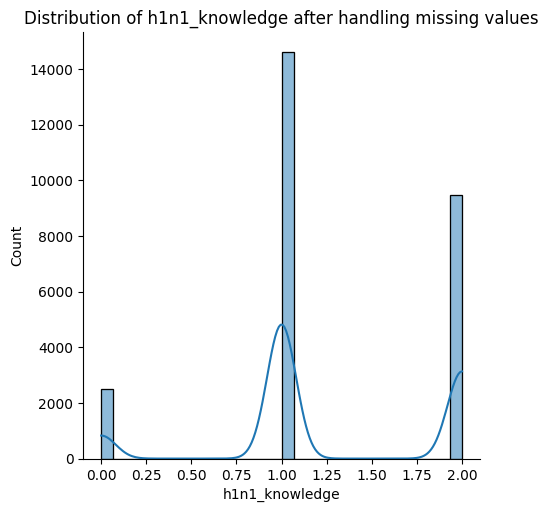

In [85]:
# Checking the distribution of the h1n1_knowledge column
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_knowledge'], kde=True)
plt.title('Distribution of h1n1_knowledge after handling missing values')
plt.show()

<Figure size 800x600 with 0 Axes>

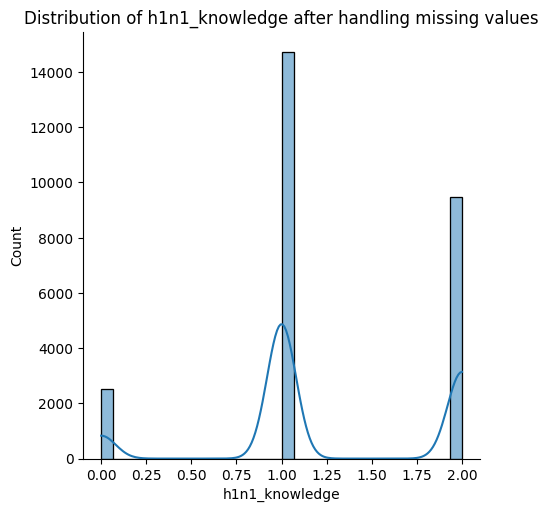

In [86]:
# Since 'h1n1_knowledge' is an ordinal feature representing the level of knowledge about H1N1,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['h1n1_knowledge'].fillna(df_train_copy['h1n1_knowledge'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_knowledge'], kde=True)
plt.title('Distribution of h1n1_knowledge after handling missing values')
plt.show()


In [87]:
# # Replacing the null values with either 0,1,2 randomly  while maintaining the distribution of the h1n1_knowledge column

# # Calculate the proportions of each unique value in the h1n1_knowledge column
# value_counts = df_train_copy['h1n1_knowledge'].value_counts(normalize=True)

# # Create a list of unique values and their corresponding probabilities
# unique_values = list(value_counts.index)
# probabilities = list(value_counts.values)

# # Replace NaN values with random choices from unique_values based on their probabilities
# df_train_copy['h1n1_knowledge'] = df_train_copy['h1n1_knowledge'].fillna(np.random.choice(unique_values, p=probabilities))


In [88]:
# # Using machine learning to replace missing values in df_train

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Select only the numerical columns for imputation
# numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# # Create an IterativeImputer object
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Fit and transform the imputer on the numerical columns
# df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# # Now, df_train_copy has missing values in numerical columns filled using machine learning

# # You can further check for missing values:
# df_train_copy.isnull().sum()



**education column**

In [89]:
df_train_copy['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [90]:
df_train_copy['education'].value_counts()

,count
education,
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363


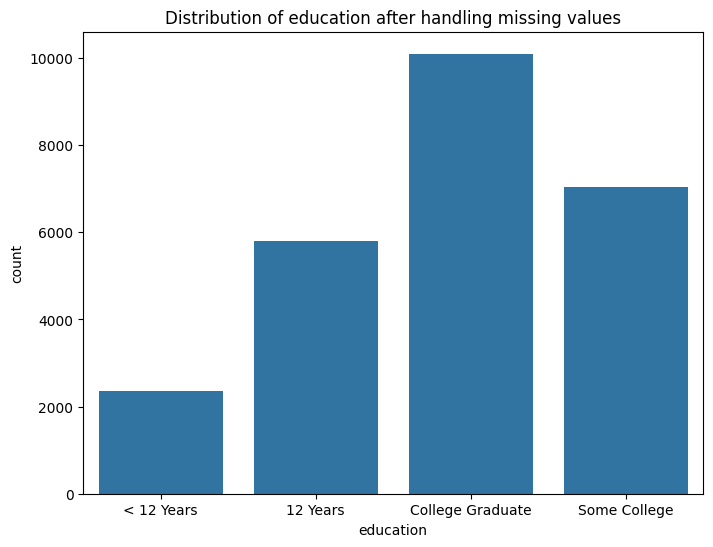

In [91]:
# Checking the distribution of the education column
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_train_copy)
plt.title('Distribution of education after handling missing values')
plt.show()

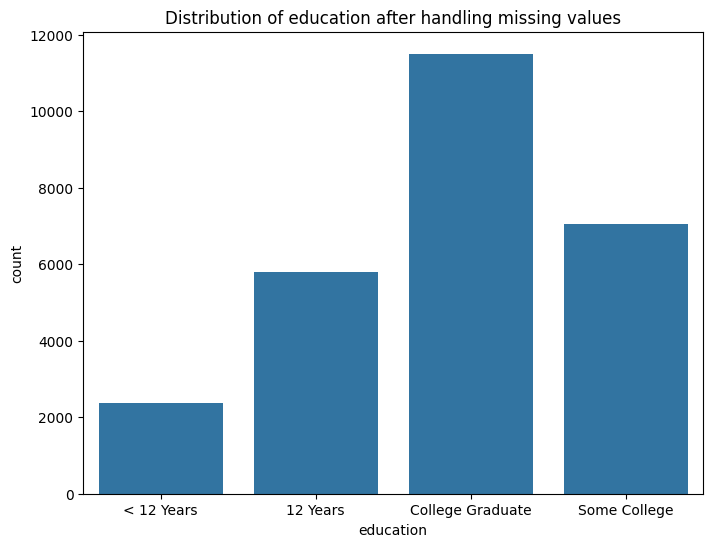

In [92]:
# Since 'education' is an ordinal feature representing the level of education,
# we can replace missing values with the mode of the column.
# The mode is the most frequent value, and it preserves the distribution of the data
# while handling missing entries.

df_train_copy['education'].fillna(df_train_copy['education'].mode()[0], inplace=True)

# You can also consider replacing missing values with the median, but the mode might be
# a better choice in this case to maintain the distribution, especially since education
# often has a skewed distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_train_copy)
plt.title('Distribution of education after handling missing values')
plt.show()


**marital_status column**

In [93]:
df_train_copy['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [94]:
df_train_copy['marital_status'].value_counts()

,count
marital_status,
Married,13555
Not Married,11744


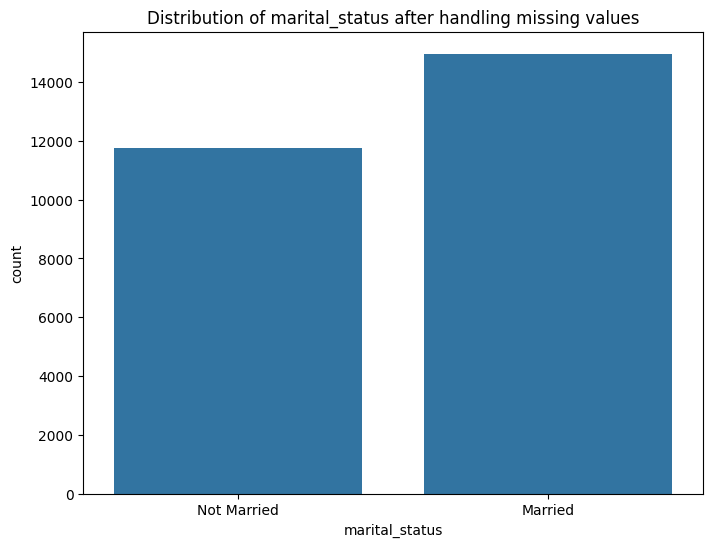

In [95]:
# Since 'marital_status' is a categorical feature representing the marital status of the respondent,
# we can replace missing values with the mode of the column.
# The mode is the most frequent value, and it preserves the distribution of the data
# while handling missing entries.

df_train_copy['marital_status'].fillna(df_train_copy['marital_status'].mode()[0], inplace=True)

# You can also consider replacing missing values with a new category, such as 'Unknown',
# but the mode might be a better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', data=df_train_copy)
plt.title('Distribution of marital_status after handling missing values')
plt.show()


In [96]:
# # Replacing the nan values marital_status colum with either Married or Not Married using machine learning

# from sklearn.impute import KNNImputer

# # Select the 'marital_status' column and convert it to numerical values using one-hot encoding
# marital_status_encoded = pd.get_dummies(df_train_copy['marital_status'], dummy_na=True)

# # Concatenate the encoded 'marital_status' column with the original dataframe
# df_train_copy = pd.concat([df_train_copy, marital_status_encoded], axis=1)

# # Create a KNNImputer object
# imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the imputer on the numerical columns, including the encoded 'marital_status'
# numerical_cols = df_train_copy.select_dtypes(include=np.number).columns
# df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# # Now, df_train_copy has missing values in 'marital_status' filled using KNN imputation

# # Inverse transform the encoded columns back to the original 'marital_status' column
# # Find the indices of the columns representing the encoded marital status
# encoded_marital_status_cols = [col for col in df_train_copy.columns if col in marital_status_encoded.columns]

# # Find the row indices where the 'marital_status' column was originally NaN
# nan_indices = df_train_copy['marital_status'].isnull()

# # Create a mapping from the numerical encoded values to the original categories
# mapping = {i: col for i, col in enumerate(marital_status_encoded.columns)}

# # Loop through the rows where 'marital_status' was NaN
# for index in df_train_copy[nan_indices].index:
#     # Find the encoded values for the current row
#     encoded_values = df_train_copy.loc[index, encoded_marital_status_cols].values

#     # Find the index of the maximum encoded value (most probable category)
#     predicted_category_index = np.argmax(encoded_values)

#     # Find the corresponding category from the mapping
#     predicted_category = mapping[predicted_category_index]

#     # Assign the predicted category to the 'marital_status' column
#     df_train_copy.loc[index, 'marital_status'] = predicted_category


# # Check if the 'marital_status' column has any missing values
# print(df_train_copy['marital_status'].isnull().sum())


**Ordinal Columns**

<Figure size 800x600 with 0 Axes>

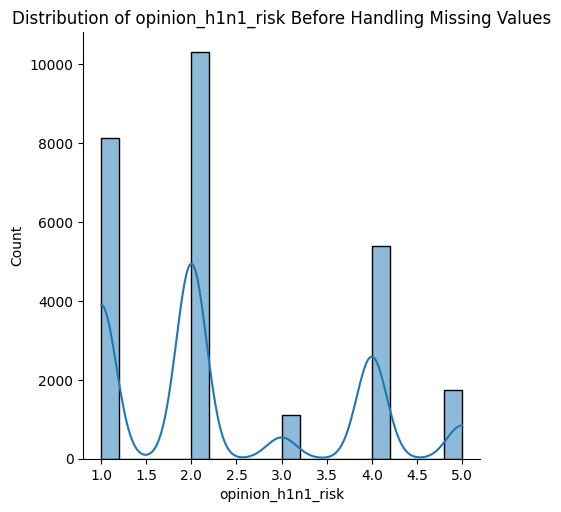

<Figure size 800x600 with 0 Axes>

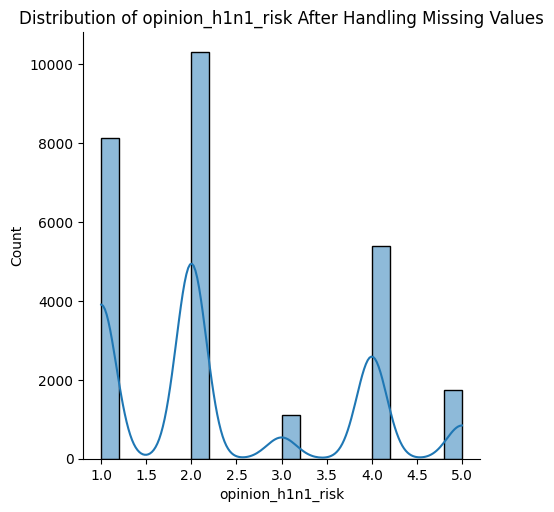

<Figure size 800x600 with 0 Axes>

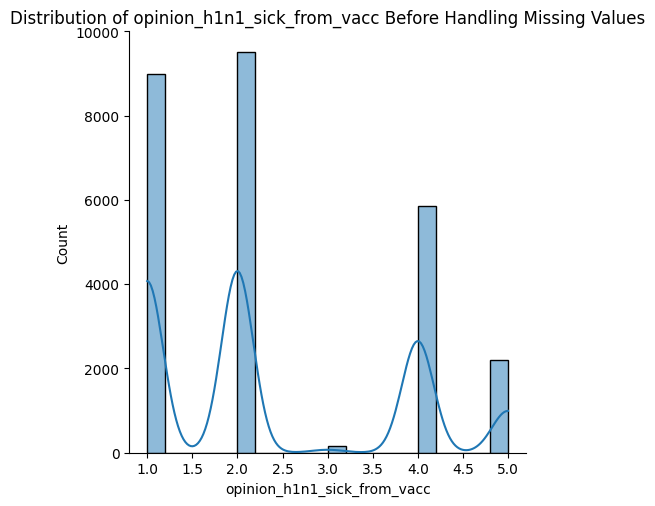

<Figure size 800x600 with 0 Axes>

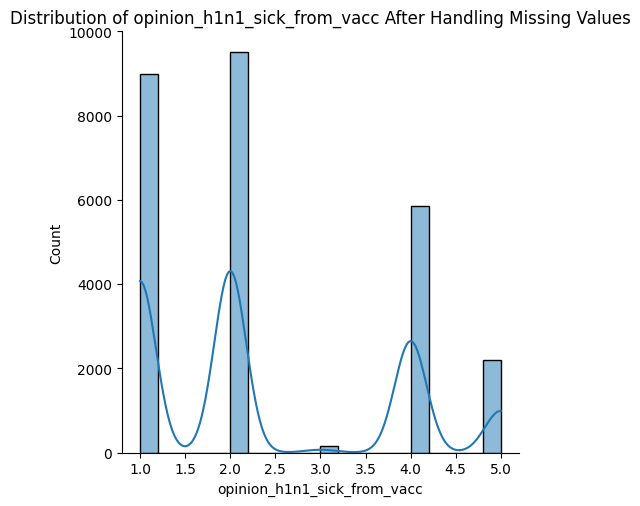

<Figure size 800x600 with 0 Axes>

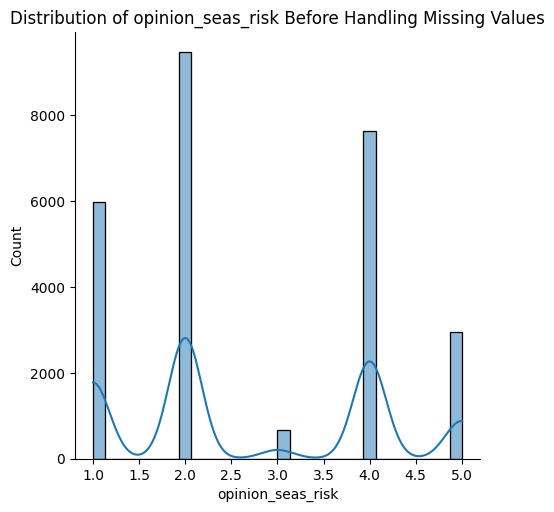

<Figure size 800x600 with 0 Axes>

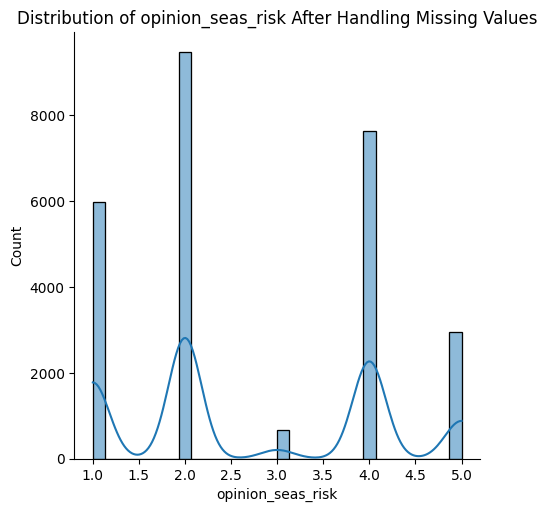

<Figure size 800x600 with 0 Axes>

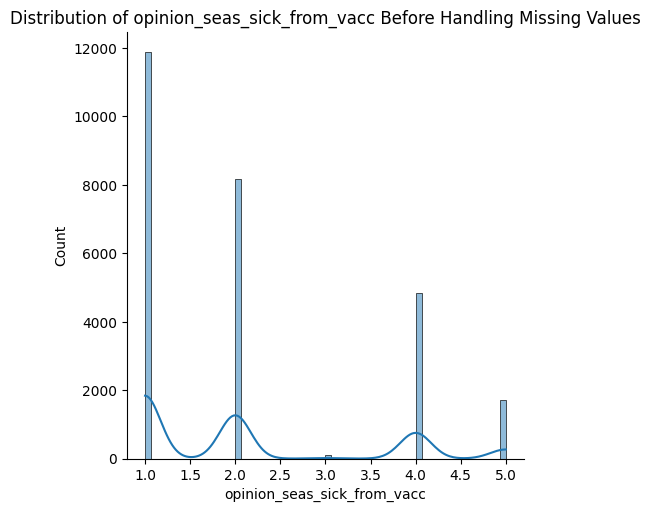

<Figure size 800x600 with 0 Axes>

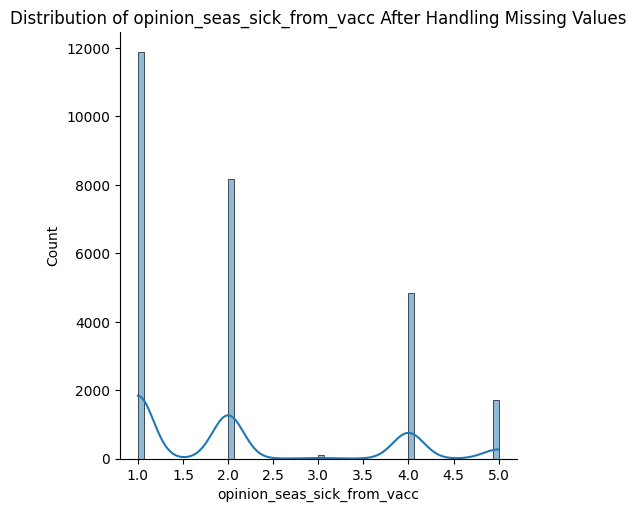

<Figure size 800x600 with 0 Axes>

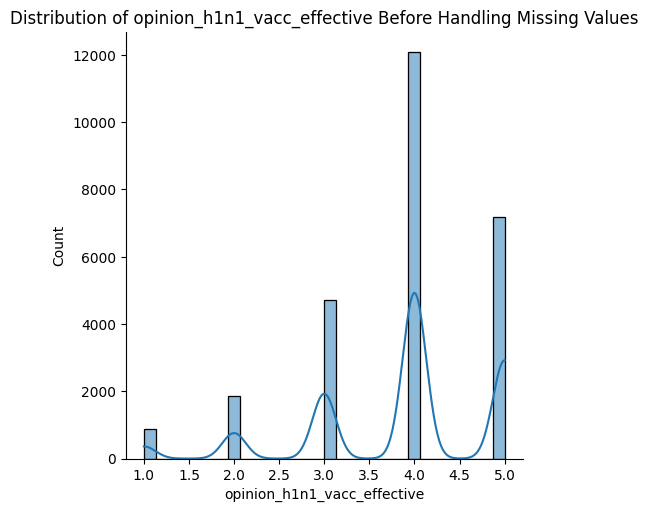

<Figure size 800x600 with 0 Axes>

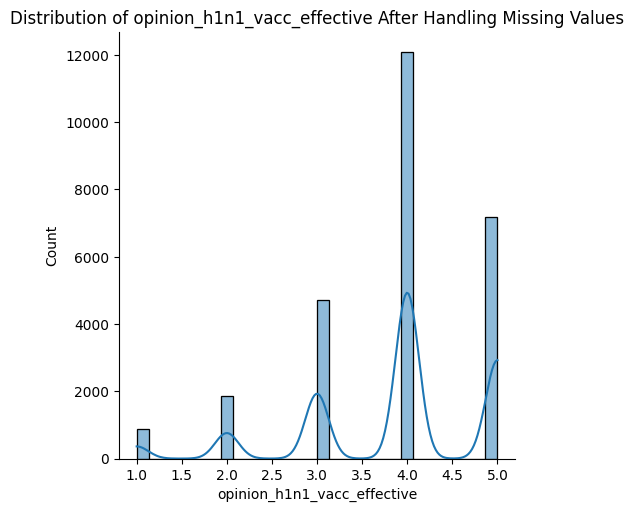

In [109]:
# opinion_h1n1_risk,opinion_seas_risk, opinion_seas_sick_from_vacc columns
# Since the above columns contain ordinal features representing the opinion
#  we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

ordinal_cols = ['opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc','opinion_seas_risk', 'opinion_seas_sick_from_vacc','opinion_h1n1_vacc_effective']

for col in ordinal_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[col], kde=True)
  plt.title(f'Distribution of {col} Before Handling Missing Values')
  plt.show()

  df_train_copy[col].fillna(df_train_copy[col].median(), inplace=True)

  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[col], kde=True)
  plt.title(f'Distribution of {col} After Handling Missing Values')
  plt.show()


**Employment Status Column**

In [98]:
df_train_copy['employment_status'].unique()


array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

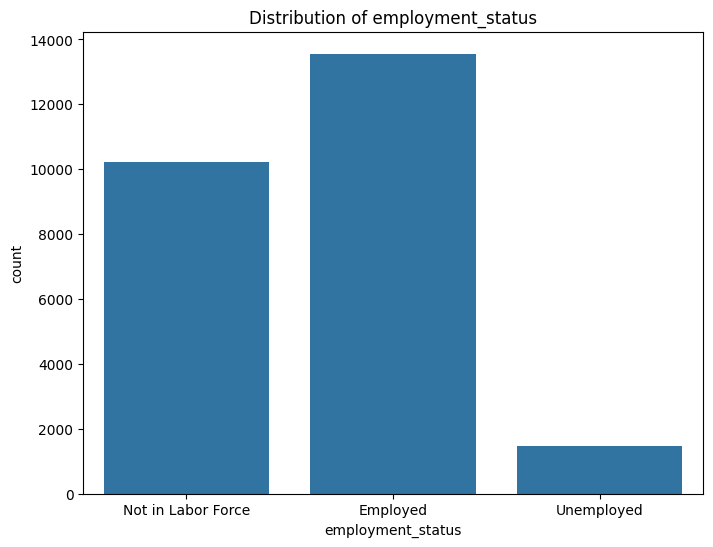

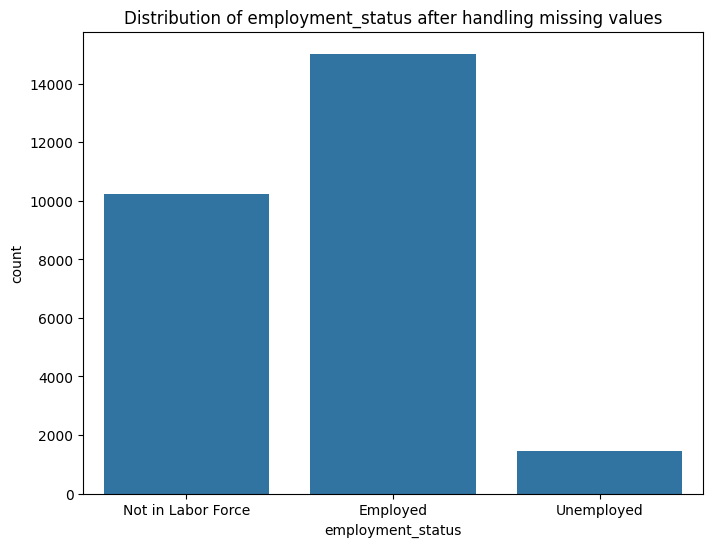

In [99]:

# Check the distribution of the employment_status column
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_status', data=df_train_copy)
plt.title('Distribution of employment_status')
plt.show()

# Since 'employment_status' is a categorical feature representing the employment status of the respondent,
# we can replace missing values with the mode of the column.
# The mode is the most frequent value, and it preserves the distribution of the data
# while handling missing entries.

df_train_copy['employment_status'].fillna(df_train_copy['employment_status'].mode()[0], inplace=True)

# You can also consider replacing missing values with a new category, such as 'Unknown',
# but the mode might be a better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_status', data=df_train_copy)
plt.title('Distribution of employment_status after handling missing values')
plt.show()


**Household_adults column**

In [100]:
df_train_copy['household_adults'].unique()

array([ 0.,  2.,  1.,  3., nan])

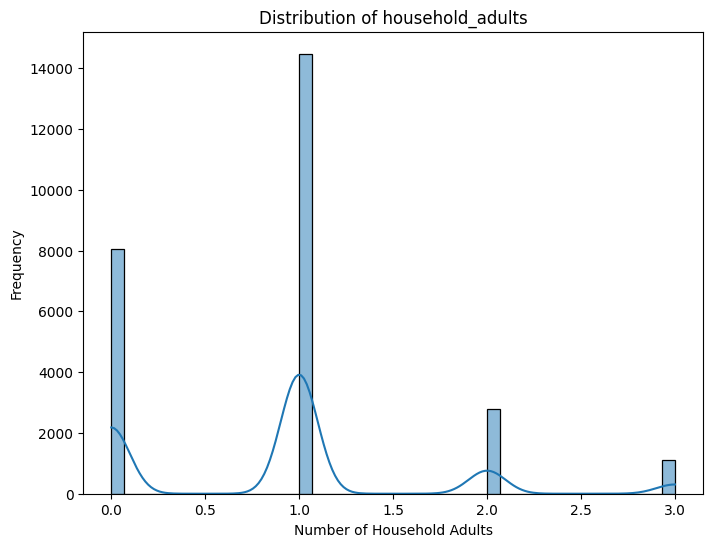

In [101]:
# Distribution graph for the household_adults column

plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_adults'], kde=True)
plt.title('Distribution of household_adults')
plt.xlabel('Number of Household Adults')
plt.ylabel('Frequency')
plt.show()


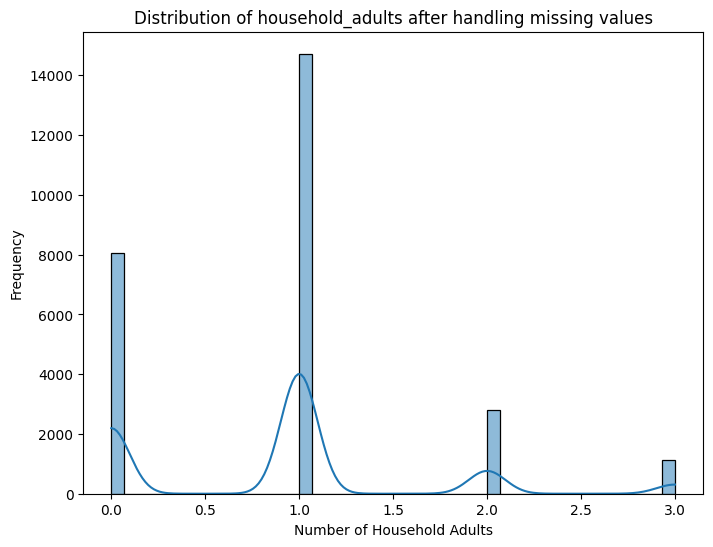

In [102]:
# Since 'household_adults' is a numerical feature representing the number of adults in the household,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['household_adults'].fillna(df_train_copy['household_adults'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_adults'], kde=True)
plt.title('Distribution of household_adults after handling missing values')
plt.xlabel('Number of Household Adults')
plt.ylabel('Frequency')
plt.show()


**household_children Column**

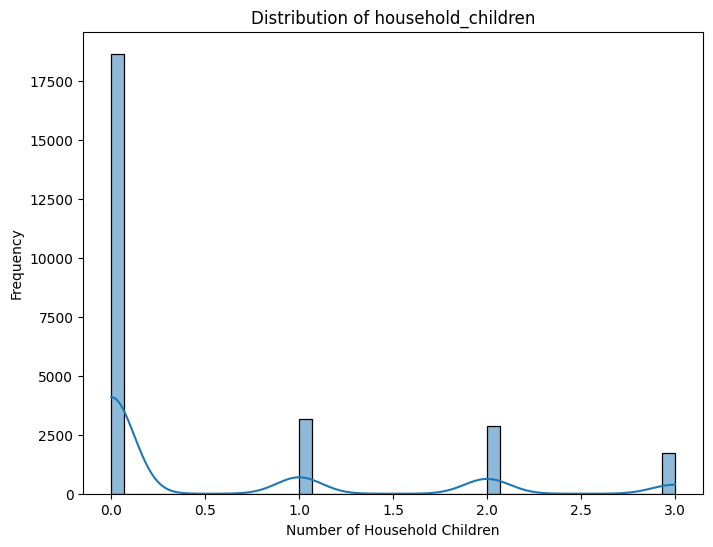

In [103]:
# Distribution graph for the household_children column

plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_children'], kde=True)
plt.title('Distribution of household_children')
plt.xlabel('Number of Household Children')
plt.ylabel('Frequency')
plt.show()

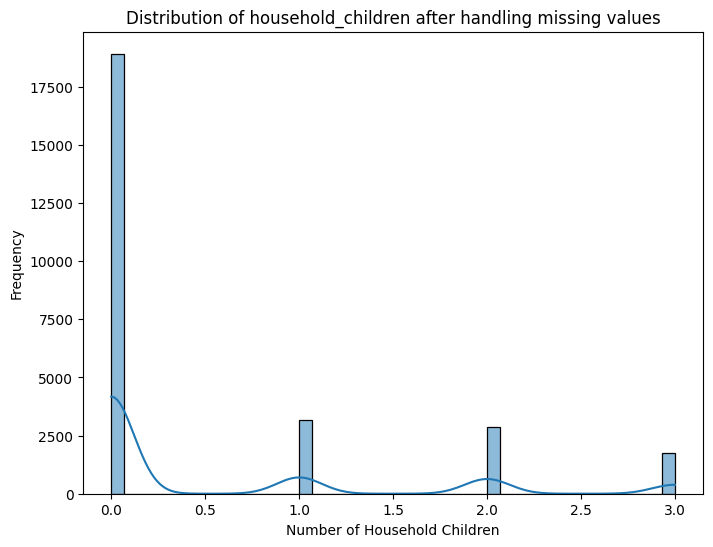

In [104]:
# Since 'household_children' is a numerical feature representing the number of children in the household,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['household_children'].fillna(df_train_copy['household_children'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_children'], kde=True)
plt.title('Distribution of household_children after handling missing values')
plt.xlabel('Number of Household Children')
plt.ylabel('Frequency')
plt.show()


In [105]:
# # Replace the nan values rent_or_own colum with either Own or Rent using machine learning

# from sklearn.impute import KNNImputer

# # Select the 'rent_or_own' column
# rent_or_own_column = df_train_copy['rent_or_own']

# # Convert categorical values to numerical using Label Encoding (optional, but can improve KNN performance)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# rent_or_own_encoded = le.fit_transform(rent_or_own_column.fillna('Unknown'))  # Fill NaN with 'Unknown' for now

# # Reshape the encoded data to fit the KNNImputer
# rent_or_own_encoded_reshaped = rent_or_own_encoded.reshape(-1, 1)

# # Create a KNNImputer object
# imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the imputer on the encoded data
# rent_or_own_imputed = imputer.fit_transform(rent_or_own_encoded_reshaped)

# # Convert the imputed numerical values back to categorical
# rent_or_own_imputed_decoded = le.inverse_transform(rent_or_own_imputed.astype(int).flatten())

# # Replace the original 'rent_or_own' column with the imputed values
# df_train_copy['rent_or_own'] = rent_or_own_imputed_decoded

# # You can now check for missing values in the 'rent_or_own' column:
# print(df_train_copy['rent_or_own'].isnull().sum())


In [111]:
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


<Figure size 800x600 with 0 Axes>

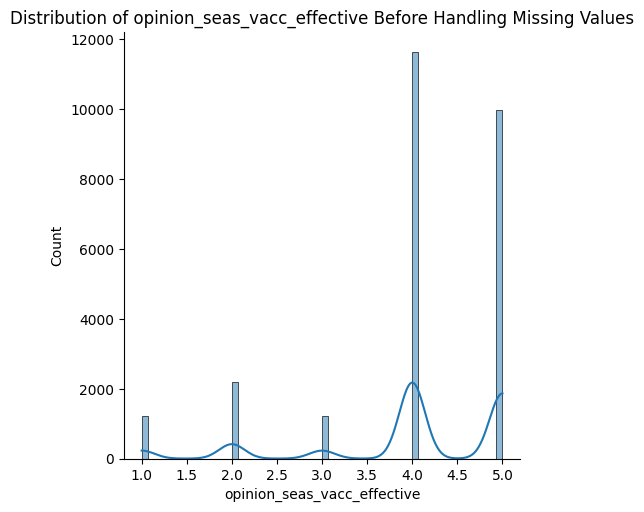

<Figure size 800x600 with 0 Axes>

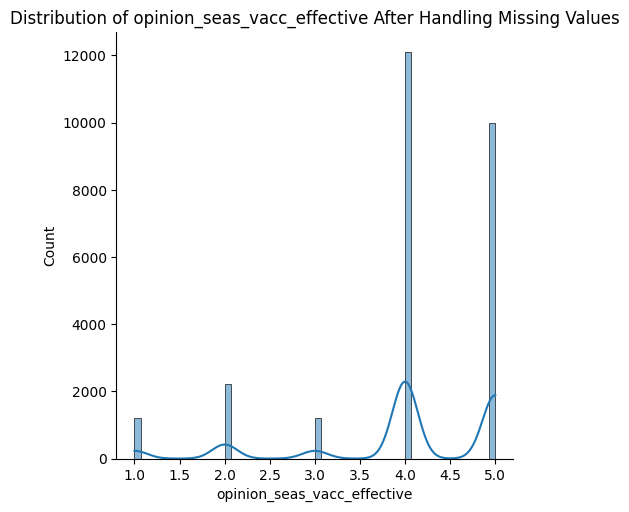

In [110]:
# prompt: replace missing values in the opinion_seas_vacc_effective column

# Since 'opinion_seas_vacc_effective' is an ordinal feature representing the opinion
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.


plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['opinion_seas_vacc_effective'], kde=True)
plt.title(f'Distribution of opinion_seas_vacc_effective Before Handling Missing Values')
plt.show()

df_train_copy['opinion_seas_vacc_effective'].fillna(df_train_copy['opinion_seas_vacc_effective'].median(), inplace=True)


plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['opinion_seas_vacc_effective'], kde=True)
plt.title(f'Distribution of opinion_seas_vacc_effective After Handling Missing Values')
plt.show()


# Modeling

In [ ]:
# prompt: create a base model to predict h1n1_vaccine, and seasonal_vaccine. The predictions for the two target variables should be float probabilities that range between 0.0 and 1.0.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Separate features (X) and target variables (y)
X = df_cleaned.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = df_cleaned['h1n1_vaccine']
y_seasonal = df_cleaned['seasonal_vaccine']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, dummy_na=True)

# Split the data into training and testing sets
X_train, X_test, y_h1n1_train, y_h1n1_test, y_seasonal_train, y_seasonal_test = train_test_split(
    X, y_h1n1, y_seasonal, test_size=0.2, random_state=42
)

# Create a Logistic Regression model
model_h1n1 = LogisticRegression(max_iter=1000)
model_seasonal = LogisticRegression(max_iter=1000)

# Train the model for h1n1_vaccine prediction
model_h1n1.fit(X_train, y_h1n1_train)

# Train the model for seasonal_vaccine prediction
model_seasonal.fit(X_train, y_seasonal_train)

# Predict probabilities for h1n1_vaccine
y_h1n1_pred_proba = model_h1n1.predict_proba(X_test)[:, 1]

# Predict probabilities for seasonal_vaccine
y_seasonal_pred_proba = model_seasonal.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC
auc_h1n1 = roc_auc_score(y_h1n1_test, y_h1n1_pred_proba)
auc_seasonal = roc_auc_score(y_seasonal_test, y_seasonal_pred_proba)

print(f"AUC for h1n1_vaccine prediction: {auc_h1n1}")
print(f"AUC for seasonal_vaccine prediction: {auc_seasonal}")


AUC for h1n1_vaccine prediction: 0.86059698795687
AUC for seasonal_vaccine prediction: 0.8597846042551617
